In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time


Before normalizing first image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

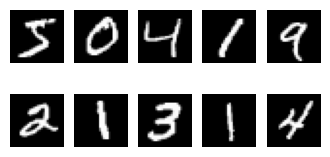

In [12]:
# load data and split it to train, test
def load_images_and_labels(file_path, image=False, label=False):
    if image:
        with open(file_path, "rb") as file:
            file.read(16)
            binary_data = file.read()
        numpy_data = np.frombuffer(binary_data, dtype=np.uint8)
        num_images = numpy_data.size // 784
        data = numpy_data.reshape(num_images, 784)
        return (data)

    if label:
        with open(file_path, "rb") as file:
            file.read(8)
            binary_data = file.read()
        numpy_data = np.frombuffer(binary_data, dtype=np.uint8)
        return (numpy_data)

# Define the data paths as a list
list_data_path = [
    '/content/drive/MyDrive/train-images.idx3-ubyte',
    '/content/drive/MyDrive/train-labels.idx1-ubyte',
    '/content/drive/MyDrive/t10k-images.idx3-ubyte',
    '/content/drive/MyDrive/t10k-labels.idx1-ubyte'
]


# Split the Data
x_train = load_images_and_labels(list_data_path[0], image=True, label=False)
y_train = load_images_and_labels(list_data_path[1], image=False, label=True)
x_test = load_images_and_labels(list_data_path[2], image=True, label=False)
y_test = load_images_and_labels(list_data_path[3], image=False, label=True)


# Resizing the Data
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)


# Normalize the Data
print(f"\nBefore normalizing first image:\n{x_train[0]}")
x_train = x_train / 255.0
x_test = x_test / 255.0
print(f"\nAfter normalizing first image:\n{x_train[0]}")


# Labelling Data,
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Dimensions of Data
print("\nShapes of Datasets \n")
print(f"x_train size: {x_train.shape}\ny_train size: {y_train.shape}")
print(f"x_test size: {x_test.shape}\ny_test size: {y_test.shape}")


# Visualize the Data
print("\nVisualising of Datasets \n")
figure, axis = plt.subplots(2, 5, figsize=(4,2))
axis = axis.ravel()
for i in range(10):
    axis[i].imshow(x_train[i].reshape(28,28), cmap="gray")
    axis[i].axis("off")
plt.show()

### Building the Model

In [4]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(0.1),
    Dense(units=64, activation="relu"),
    Dropout(0.1),
    Dense(units=10, activation="softmax"),
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,410 (196.91 KB)

 Trainable params: 50,410 (196.91 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# Train the Model
time_1 = time.time()
train = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)
time_2 = time.time()
print(f"Duration of training: {(time_2 - time_1) / 60:.2f} minute")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.7435 - loss: 0.7673 - val_accuracy: 0.9748 - val_loss: 0.0879
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9535 - loss: 0.1512 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9653 - loss: 0.1189 - val_accuracy: 0.9847 - val_loss: 0.0517
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9860 - val_loss: 0.0454
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9764 - loss: 0.0787 - val_accuracy: 0.9870 - val_loss: 0.0479
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9779 - loss: 0.0717 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9802 - loss: 0.0648 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9823 -

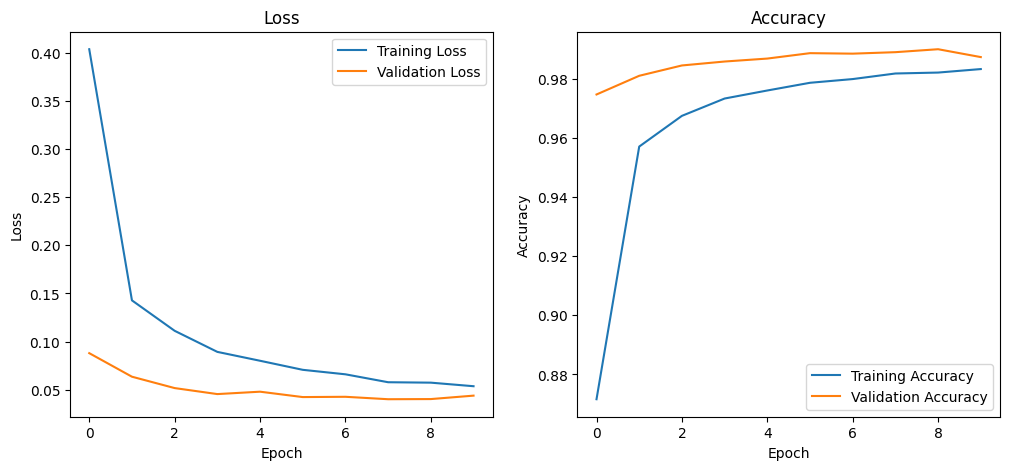

In [13]:
# Graphing the process
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)    #  row column, index
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [8]:
# Testing the Model
loss, acc = model.evaluate(x_test, y_test)
print(f"accuracy rate: {acc:.4f}\nloss rate: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9795 - loss: 0.0698
accuracy rate: 0.9850
loss rate: 0.0526


In [9]:
model.save('digit_model.h5')
print("Model saved successfully!")

Model saved successfully!


Model loaded successfully!
Initializing webcam...


<IPython.core.display.Javascript object>

Image captured!
Predicted Digit: 9
Confidence: 80.21%


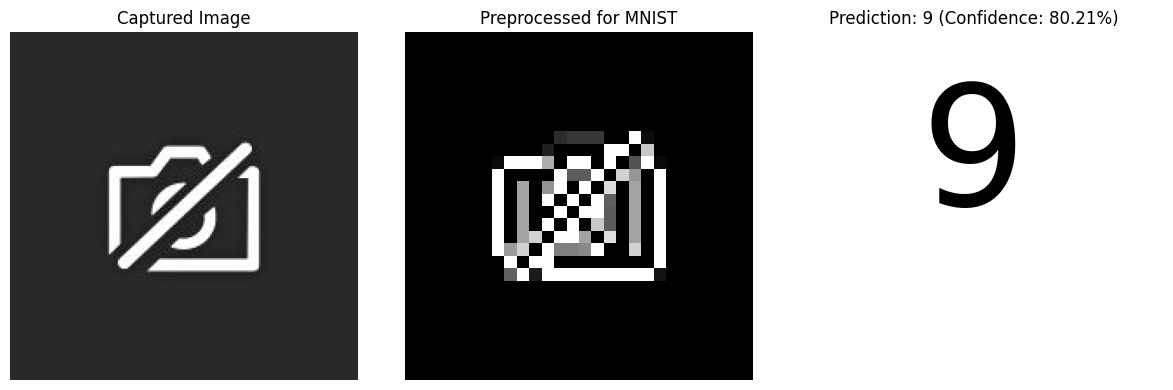

(np.int64(9), 0.8020606637001038)

In [15]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import PIL.Image
from base64 import b64decode
import io
import matplotlib.pyplot as plt
import warnings

# Suppress the specific warning about metrics
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Load trained model
model = load_model("/content/drive/MyDrive/digit_model.h5")
print("Model loaded successfully!")

# Helper function to capture image from webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      capture.style.backgroundColor = '#4CAF50';
      capture.style.border = 'none';
      capture.style.color = 'white';
      capture.style.padding = '15px 32px';
      capture.style.textAlign = 'center';
      capture.style.textDecoration = 'none';
      capture.style.display = 'inline-block';
      capture.style.fontSize = '16px';
      capture.style.margin = '4px 2px';
      capture.style.cursor = 'pointer';
      capture.style.borderRadius = '12px';
      div.appendChild(capture);

      //instructions
      const instructions = document.createElement('div');
      instructions.innerHTML = '<p>Hold a handwritten digit in view, then click Capture</p>';
      instructions.style.marginBottom = '10px';
      div.appendChild(instructions);

      //a visual guide/frame for positioning the digit
      const guideDiv = document.createElement('div');
      guideDiv.style.position = 'relative';
      guideDiv.style.width = 'fit-content';
      guideDiv.style.margin = '0 auto';

      const video = document.createElement('video');
      video.style.display = 'block';
      video.style.width = '640px';
      video.style.height = '480px';

      const overlay = document.createElement('div');
      overlay.style.position = 'absolute';
      overlay.style.top = '50%';
      overlay.style.left = '50%';
      overlay.style.width = '200px';
      overlay.style.height = '200px';
      overlay.style.border = '3px dashed green';
      overlay.style.transform = 'translate(-50%, -50%)';
      overlay.style.pointerEvents = 'none';

      guideDiv.appendChild(video);
      guideDiv.appendChild(overlay);
      div.appendChild(guideDiv);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      video.srcObject = stream;
      await video.play();

      // Resize output to fit the video element
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      //second canvas with just the ROI for preview
      const roiCanvas = document.createElement('canvas');
      const centerX = video.videoWidth / 2;
      const centerY = video.videoHeight / 2;
      const roiSize = 200 * (video.videoWidth / 640); // Scale based on video size

      roiCanvas.width = roiSize;
      roiCanvas.height = roiSize;
      roiCanvas.getContext('2d').drawImage(
        video,
        centerX - roiSize/2, centerY - roiSize/2, roiSize, roiSize,
        0, 0, roiSize, roiSize
      );

      stream.getTracks().forEach(t => t.stop());
      div.remove();

      return {
        full: canvas.toDataURL('image/jpeg', quality),
        roi: roiCanvas.toDataURL('image/jpeg', quality)
      };
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))

    # Save both the full image and the ROI
    binary = b64decode(data['full'].split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    roi_binary = b64decode(data['roi'].split(',')[1])
    roi_filename = 'roi_' + filename
    with open(roi_filename, 'wb') as f:
        f.write(roi_binary)

    return filename, roi_filename

def preprocess_for_prediction(image_path):
    """Preprocess image for MNIST prediction with multiple methods"""
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # resize and normalize
    basic = cv2.resize(img, (28, 28))
    basic = 255 - basic  # Invert

    # thresholding
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    thresh = cv2.resize(thresh, (28, 28))

    # With adaptive thresholding
    adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)
    adaptive = cv2.resize(adaptive, (28, 28))

    # Return all preprocessing methods as a list
    methods = [basic, thresh, adaptive]
    preprocessed = []

    for method in methods:
        # Normalize to [0,1]
        norm = method.astype('float32') / 255.0
        # Reshape for the model
        reshaped = norm.reshape(1, 28, 28, 1)
        preprocessed.append(reshaped)

    return preprocessed

def predict_digit_with_confidence(model, preprocessed_images):
    """Make predictions with multiple preprocessing methods and analyze confidence"""
    results = []

    for img in preprocessed_images:
        # Make prediction
        pred = model.predict(img, verbose=0)
        digit = np.argmax(pred)
        confidence = float(pred[0][digit])
        results.append((digit, confidence, img))

    # Sort by confidence
    results.sort(key=lambda x: x[1], reverse=True)

    # Return the highest confidence result
    best_digit, best_confidence, best_img = results[0]
    return best_digit, best_confidence, best_img

def display_prediction_results(original_img, processed_img, digit, confidence):
    """Display the original image, processed image, and prediction results"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(PIL.Image.open(original_img))
    plt.title("Captured Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(processed_img.reshape(28, 28), cmap='gray')
    plt.title("Preprocessed for MNIST")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    # Create a simple visualization of the prediction
    plt.text(0.5, 0.5, str(digit), fontsize=120, ha='center')
    plt.title(f"Prediction: {digit} (Confidence: {confidence:.2%})")
    plt.axis('off')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Main function to capture and predict
def capture_and_predict():
    print("Initializing webcam...")
    # Capture image from webcam
    filename, roi_filename = take_photo()
    print("Image captured!")

    # Preprocess the ROI image with multiple methods
    preprocessed_images = preprocess_for_prediction(roi_filename)

    # Get the best prediction
    digit, confidence, best_img = predict_digit_with_confidence(model, preprocessed_images)

    print(f"Predicted Digit: {digit}")
    print(f"Confidence: {confidence:.2%}")

    # Display results
    display_prediction_results(roi_filename, best_img, digit, confidence)

    return digit, confidence

# Run the function
capture_and_predict()